## Семинар 2

# Метод опорных векторов для задачи классификации

### Описание алгоритма:

Метод опорных векторов SVM (Support Vector Machines) — это алгоритм машинного обучения, используемый для решения задач классификации, регрессии и обнаружения выбросов. 

Рассмотрим подробно SVM для метода бинарной классификации (разделеня на два класса) в случае линейно разделимых и линейно неразделимых классов.

**Случай линейно разделимых классов** (т.е. таких, для которых возможно построить гиперплоскость в n-мерном пространстве для разделения объектов двух классов):
Модель SVM ищет гиперплоскость с максимальной шириной разделяющей полосы (margin), называемой линией зазора, то есть разделяющую гиперплоскость, максимально отдаленную от обоих классов.

Чтобы иметь возможность наглядной визуализации рассмотрим задачу на примере данных с двумя признаками. На рисунке ниже изображены различные варианты проведения разделяющей гиперплоскости (в данном случае прямой) с линией зазора.

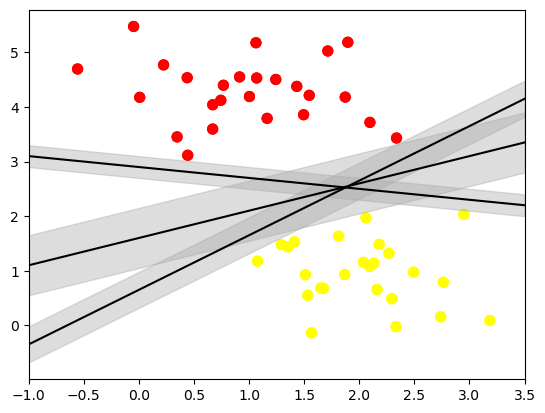

Метод опорных векторов, решает задачу оптимизации, подбирая прямую с максимальным зазором между ближайшими точками разных классов. Эти точки называются опорными векторами.

Классификатор SVM устанавливает самую широкую, какую только возможно, полосу (представленную параллельными
пунктирными линиями на рисунке ниже) между классами.

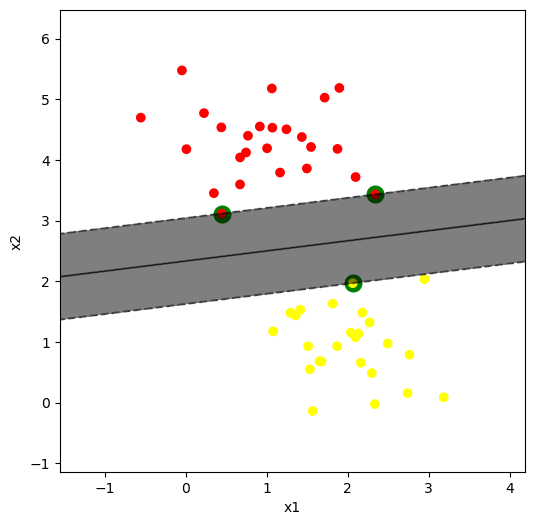

Уравнения гиперплоскости и линий зазора имеют вид соответственно:

$<\vec{w} ;\vec{x} > + b = 0$

$<\vec{w} ;\vec{x} > + b = 1$

$<\vec{w} ;\vec{x} > + b = -1$

Оптимальные значения $\vec{w}$ и $b$ подбираются в результате решения задачи оптимизации, которая заключается в минимизации функции потерь и максимизации зазора между классами.

В библиотеке `Scikit-Learn` метод опорных векторов для классификации реализован в `sklearn.svm.SVC`. 
Для линейно разделимых данных можно использовать класс SVC с линейным ядром (`kenel = 'linear'`). Также в `Scikit-Learn` есть другая реализация метода опорных векторов для случая линейной разделимости данных `sklearn.svm.LinearSVC`, но в нём нет возможности выводить информацию об опорных векторах.

   Классификация методом опорных векторов может осуществляться с *жёстким зазором* (hard margin classification) и с *мягким зазором* (soft margin classification). Разберёмcя, что это значит.

   При классификации с *жестким зазором* все образцы должны находятся вне линии зазора. 

   При классификацией с мягким зазором допускаются нарушения границы зазора, т.е. появления экземпляров, которые оказываются внутри полосы зазора или даже на неправильной стороне, отыскивается баланс между удержанием полосы как можно более широкой и ограничением количества нарушений зазора.
 
   Классификация с жестким зазором  имеет недостатки. Во-первых, она работает, только если данные являются линейно разделимыми. Во-вторых, она довольно чувствительна к выбросам. Чтобы избежать таких проблем, предпочтительнее применять более гибкую модель. 
В классах `SVM` библиотеки `Scikit-Learn` можно управлять упомянутым балансом, используя гиперпараметр `C`: меньшее значение `C` ведет к более широкой полосе, но большему числу нарушений зазора, а чем больше `C`, тем более жёсткий зазор.

**Случай линейно неразделимых классов**:

В случае линейной неразделимости вводятся дополнительные переменные, характеризующие допустимую ошибку классификации на различных объектах, и применяется трюк, заключающийся в переходе от скалярного произведения к нелинейной функции ядра (kernel trick). Данный прием позволяет перейти в пространство большей размерности, где выборка может быть линейно разделена.

Рассмотрим три вида ядер:

1. *Линейное ядро* (kernel = 'linear' ) — это ядро, которое строит гиперплоскость для разделения данных. Оно часто используется в задачах с линейно разделимыми данными. В математическом смысле линейное ядро вычисляет скалярное произведение между векторами признаков объектов. Если объекты невозможно разделить линейной гиперплоскостью, то следует с этим ядром использовать классификацию с мягким зазором (soft margin), которая позволяет допустить ошибки классификации и при этом сохранить разделяющую гиперплоскость.

2. *Радиальное базисное ядро* (kernel = 'rbf') — это наиболее часто используемое ядро (установлено по умолчанию), которое может разделять данные, не являющиеся линейно разделимыми. Оно создает границу принятия решений в виде радиально-симметричного колокола.

3. *Ядро с полиномиальной функцией* (kernel = 'poly') — это ядро, которое вводит полиномиальную функцию в пространство признаков для разделения данных. Это может быть полезно для данных, которые не могут быть разделены гиперплоскостью.

Существуют и другие ядра, но они применяются гораздо реже.

Мультиклассовая классификация также поддерживается классификатором `SVC`, для этого нужно установить `decision_function_shape = 'ovo'`.

Импортируем библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

## Бинарная классификация линейно разделимых классов

### 1.1 Cгенерируйте данные для задачи классификации на два класса при помощи sklearn.datasets.make_blobs, содержащие два признака и 30 наблюдений так, чтобы два класса точек были линейно разделимы. Визуализируйте их на диаграмме рассеяния.

In [2]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

In [3]:
X[:5]

array([[-5.51629264,  8.04763857],
       [-6.03989846,  8.76108988],
       [-5.53647888,  7.26932177],
       [-5.90036714,  8.99683108],
       [-5.48509529,  7.28269814]])

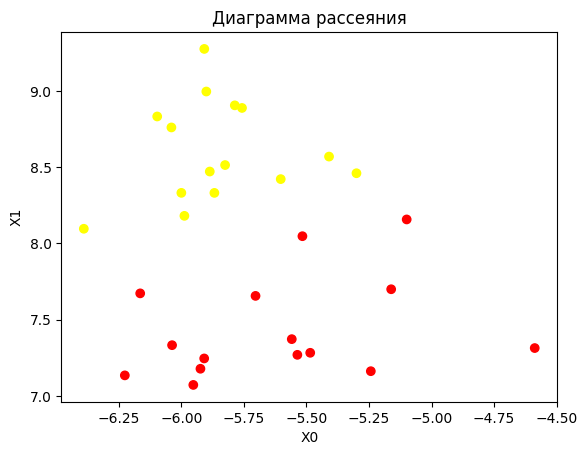

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plt.title("Диаграмма рассеяния")
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 1.2  Обучите модель опорно-векторного классификатора `sklearn.svm.SVC` с линейным ядром. Поскольку классы линейно разделимы, сделайте классификацию с жестким зазором, для этого возьмите большое значение C.

In [5]:
svm_linear = SVC(kernel="linear", C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

### 1.3  Выведете координаты опорных векторов (атрибут `support_vectors_`) и их индексы (атрибут support_). Выведете количество опорных векторов, принадлежащих каждому классу. Укажите опорные вектора на диаграмме рассеяния. 

координаты опорных векторов

In [6]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

индексы опорных векторов

In [7]:
svm_linear.support_

array([ 0,  8, 29], dtype=int32)

количество опорных векторов, принадлежащих каждому классу

In [8]:
svm_linear.n_support_

array([1, 2], dtype=int32)

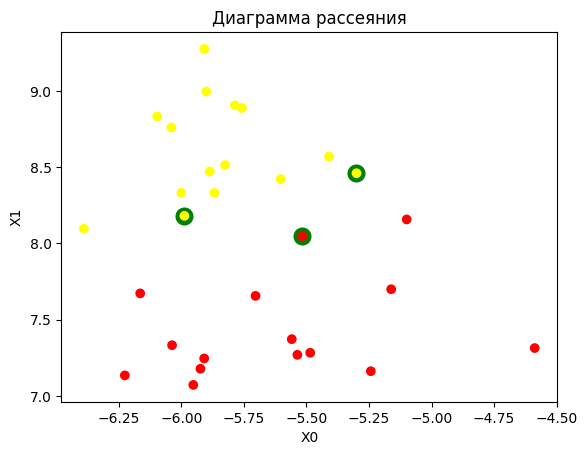

In [9]:
plt.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1], linewidths=7, facecolors='green')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plt.title("Диаграмма рассеяния")
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 1.4  Выведете коэффициенты гиперплоскости и свободный член. Изобразите на графике линию разделения классов и линии зазора, как линии уровня гиперплоскости. Убедитесь, что метод `decision_function` выдаёт массив значений, который получается при подстановке данных в уравнение этой поверхности. И если значение в этом массиве меньше нуля, то соответствующее наблюдение относится к классу 0, а если оно больше нуля, то к классу 1. Напишите функцию `plot_decision_regions`, строящую линию разделения и зазор.

In [10]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [11]:
svm_linear.intercept_

array([-64.2533988])

In [12]:
x0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, X.shape[0])
x1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, X.shape[0])

x0_grid, x1_grid = np.meshgrid(x0, x1)
z_grid = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * x0_grid + svm_linear.coef_[0][1] * x1_grid

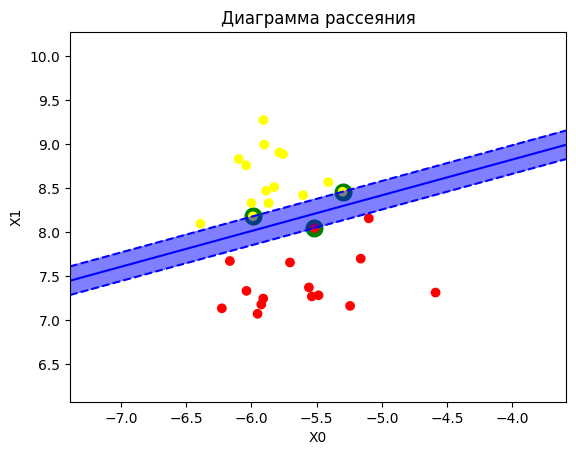

In [13]:
plt.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1], linewidths=7, facecolors='green')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

plt.contour(x0_grid, x1_grid, z_grid, colors='b', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.contourf(x0_grid, x1_grid, z_grid, colors='b', levels=[-1, 0, 1], alpha=0.5)

plt.title("Диаграмма рассеяния")
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [14]:
svm_linear.decision_function(X)

array([-0.99955506,  4.69451004, -5.73328797,  5.79485373, -5.77948397,
       -2.93838745, -5.04462056,  4.95305349,  0.99966959,  4.77568075,
        1.95746095,  1.51907024, -1.36522373,  5.27890892, -4.02534872,
        2.53366624, -1.68466963,  1.48351626, -5.3266102 , -7.12654602,
        7.53274364, -4.83817017,  1.94532985,  1.62630974, -4.94810925,
       -7.83070633,  2.64183699, -5.90735383, -4.09222798,  0.99975728])

In [15]:
svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X[:, 0] + svm_linear.coef_[0][1] * X[:, 1]

array([-0.99955506,  4.69451004, -5.73328797,  5.79485373, -5.77948397,
       -2.93838745, -5.04462056,  4.95305349,  0.99966959,  4.77568075,
        1.95746095,  1.51907024, -1.36522373,  5.27890892, -4.02534872,
        2.53366624, -1.68466963,  1.48351626, -5.3266102 , -7.12654602,
        7.53274364, -4.83817017,  1.94532985,  1.62630974, -4.94810925,
       -7.83070633,  2.64183699, -5.90735383, -4.09222798,  0.99975728])

In [16]:
def plot_decision_regions(X,y,model):
    x0=np.linspace(X[:,0].min()-1,X[:,0].max()+1,X.shape[0])
    x1=np.linspace(X[:,1].min()-1,X[:,1].max()+1,X.shape[0])
    x0_grid,x1_grid=np.meshgrid(x0,x1)
    z_grid = model.decision_function(np.array([x0_grid.ravel(),x1_grid.ravel()]).T).reshape(x0_grid.shape)
    
    
    
    plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],linewidth = 7,facecolors = 'green')
    plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')

    plt.contour(x0_grid,x1_grid,z_grid,colors = 'b',levels=[-1,0,1],linestyles = ['--','-','--'])
    plt.contourf(x0_grid,x1_grid,z_grid,colors = 'b',levels=[-1,0,1],alpha = 0.5)

    plt.title('Диаграмма рассеяния')
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.show()

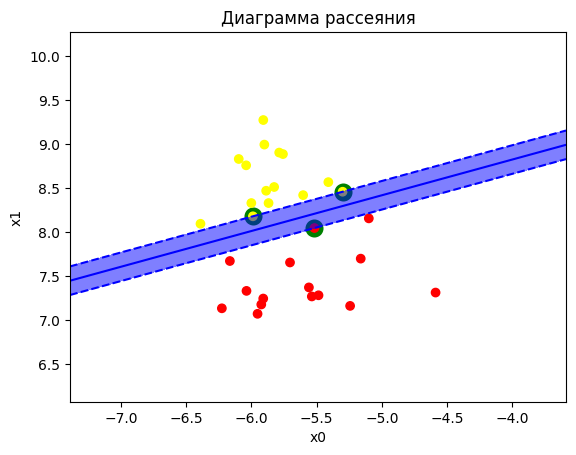

In [17]:
plot_decision_regions(X, y, svm_linear)

### 1.5  Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [18]:
y_pred = svm_linear.predict(X)
acc = metrics.accuracy_score(y, y_pred)
acc

1.0

In [19]:
f1 = metrics.f1_score(y, y_pred)
f1

np.float64(1.0)

In [20]:
observation = [[-6.5, 7.5]]
y_pred_observation = svm_linear.predict(observation)
y_pred_observation

array([0])

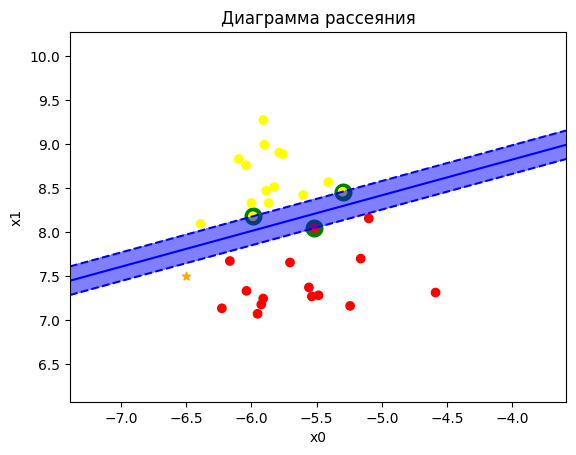

In [21]:
plt.scatter(observation[0][0], observation[0][1], marker='*', color='orange')

plot_decision_regions(X, y, svm_linear)

##  Бинарная классификация линейно неразделимых классов

### 2.1 Сгенерируйте данные для задачи классификации на два класса при помощи `sklearn.datasets.make_circles`, содержащие два признака и 30 наблюдений так, чтобы два класса точек были линейно неразделимы, но на границе разделения точки не перекрывали друг друга. Визуализируйте данные на диаграмме рассеяния. 

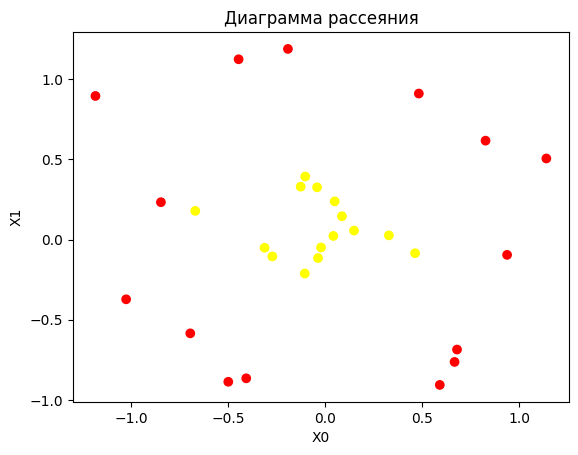

In [22]:
X, y = make_circles(n_samples=30, random_state=5, factor=0.1, noise=0.2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plt.title("Диаграмма рассеяния")
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 2.2 Обучите модель опорно-векторного классификатора `sklearn.svm.SVC` с ядром в виде радиально базисной функции. Cделайте классификацию с жестким зазором, для этого возьмите большое значение гиперпараметра C.

In [23]:
svm_rbf = SVC(kernel='rbf', C=100)
svm_rbf.fit(X, y)

SVC(C=100)

### 2.3 Выведете координаты опорных векторов и их индексы. Выведете количество опорных векторов, принадлежащих    каждому классу. Выведете количество опорных векторов, принадлежащих каждому классу. Изобразите на диаграмме рассеяния линию разделения и жесткий зазор. Оцените качество работы модели.

In [24]:
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

In [25]:
svm_rbf.support_

array([11, 20, 21, 23, 28, 29, 25, 27], dtype=int32)

In [26]:
svm_rbf.n_support_

array([6, 2], dtype=int32)

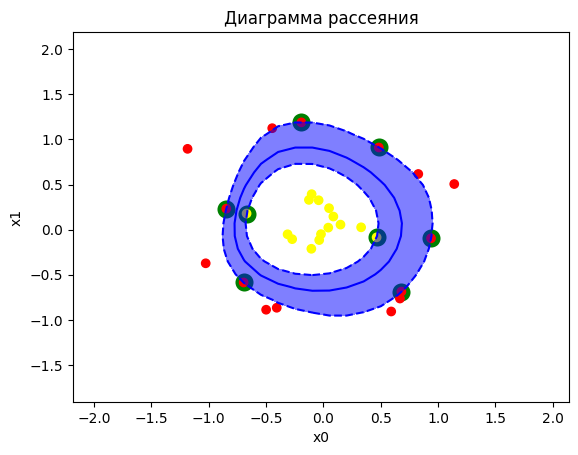

In [27]:
plot_decision_regions(X, y, svm_rbf)

### 2.4 Сгенерируйте данные для задачи классификации на два класса при помощи `sklearn.datasets.make_blobs`, содержащие  два признака и 30 наблюдений так, чтобы граница классов перекрывалась. Визуализируйте их на диаграмме рассеяния.

In [28]:
X,y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

### 2.5 Обучите модель опорно-векторного классификатора `sklearn.svm.SVC` с полиномиальным ядром. Поскольку классы линейно неразделимы, сделайте классификацию с мягким зазором, для этого возьмите маленькое значение гиперпараметра C.

In [29]:
svm_poly = SVC(kernel='poly', C=10, degree=2)
svm_poly.fit(X, y)

SVC(C=10, degree=2, kernel='poly')

### 2.6 Выведете координаты опорных векторов и их индексы. Выведете количество опорных векторов, принадлежащих каждому классу. Изобразите на диаграмме рассеяния линию разделения и мягкий зазор. Оцените качество работы модели.

In [30]:
svm_poly.support_vectors_

array([[-5.48340969,  8.52238291],
       [-5.81131684,  7.83707625],
       [-5.55783439,  7.34049481],
       [-4.75416287,  8.71477783],
       [-4.8626287 ,  7.91334101],
       [-6.61796227,  7.86603938],
       [-6.72548855,  6.9245208 ],
       [-6.17045201,  7.11889057],
       [-6.39507181,  7.27123257],
       [-4.87623828,  8.52709604],
       [-6.10105227,  8.30178812],
       [-5.40598326,  8.45958294],
       [-5.9022326 ,  8.54667052],
       [-6.78315809,  7.8895225 ],
       [-5.06807681,  8.71832644],
       [-5.86995333,  8.30147083],
       [-5.79510016,  8.62102509],
       [-6.07971401,  8.03780617]])

In [31]:
svm_poly.support_

array([ 0,  5,  6, 12, 14, 16, 21, 24, 28,  8, 10, 11, 15, 17, 22, 23, 26,
       29], dtype=int32)

In [32]:
svm_poly.n_support_

array([9, 9], dtype=int32)

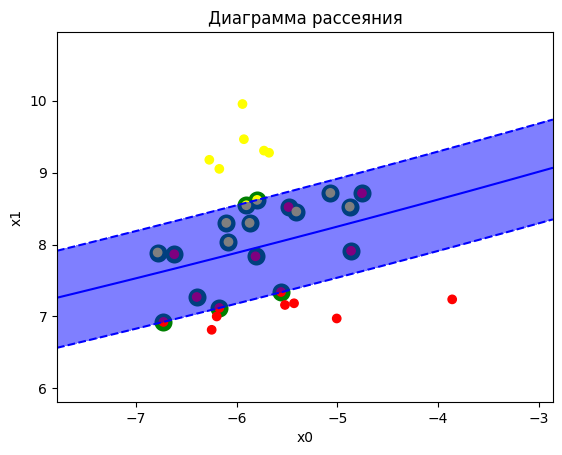

In [33]:
plot_decision_regions(X, y, svm_poly)

**Задания для самостоятельного выполнения:**
1. Загрузите встроенные данные `sklearn.datasets.load_iris`. Возьмите последние два столбца (длина и ширина лепестков) и первые 100 строк данных, для того, чтобы иметь возможность рассматривать задачу бинарной классификации с двумя признаками.
2. Стандартизируйте данные.
3. Изобразите их на диаграмме рассеяния. Являются ли они линейно разделимыми?
4. Обучите модель опорно-векторного классификатора `sklearn.svm.SVC` с линейным ядром. Сделайте классификацию с жестким зазором.
5. Выведете координаты опорных векторов и их индексы. Выведете количество опорных векторов, принадлежащих каждому классу. Изобразите на диаграмме рассеяния линию разделения и зазор. Оцените качество работы модели.
7. Сгенерируйте данные для задачи классификации на два класса при помощи `sklearn.datasets.make_classification`, содержащие  два признака и 100 наблюдений так, чтобы граница классов немного перекрывалась. Визуализируйте их на диаграмме рассеяния.
8. Обучите модели опорно-векторного классификатора `sklearn.svm.SVC` с линейным ядром, полиномиальным ядром пятой степени и с RBF-ядром. Сделайте классификацию с мягким зазором, для этого возьмите значение гиперпараметра `C = 1` для всех моделей.
9. Изобразите на диаграмме рассеяния линию разделения и мягкий зазор для каждой модели. Вычислите метрики для оценки работы каждой модели. Сделайте вывод о том, какая модель лучше классифицирует эти данные.

1. Загрузите встроенные данные `sklearn.datasets.load_iris`. Возьмите последние два столбца (длина и ширина лепестков) и первые 100 строк данных, для того, чтобы иметь возможность рассматривать задачу бинарной классификации с двумя признаками.

In [34]:
iris = load_iris()

In [35]:
X, y = iris.data[:100, 2:4], iris.target[:100]

2. Стандартизируйте данные.

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. Изобразите их на диаграмме рассеяния. Являются ли они линейно разделимыми?

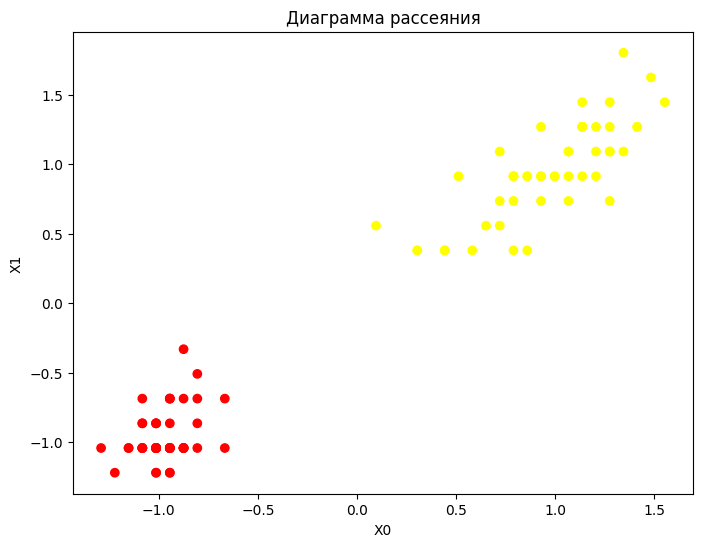

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
plt.title("Диаграмма рассеяния")
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

4. Обучите модель опорно-векторного классификатора `sklearn.svm.SVC` с линейным ядром. Сделайте классификацию с жестким зазором.

In [38]:
svm_linear = SVC(kernel="linear", C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

5. Выведете координаты опорных векторов и их индексы. Выведете количество опорных векторов, принадлежащих каждому классу. Изобразите на диаграмме рассеяния линию разделения и зазор. Оцените качество работы модели.

In [39]:
svm_linear.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

In [40]:
svm_linear.support_

array([44, 98], dtype=int32)

In [41]:
svm_linear.n_support_

array([1, 1], dtype=int32)

In [42]:
x0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, X.shape[0])
x1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, X.shape[0])

x0_grid, x1_grid = np.meshgrid(x0, x1)
z_grid = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * x0_grid + svm_linear.coef_[0][1] * x1_grid

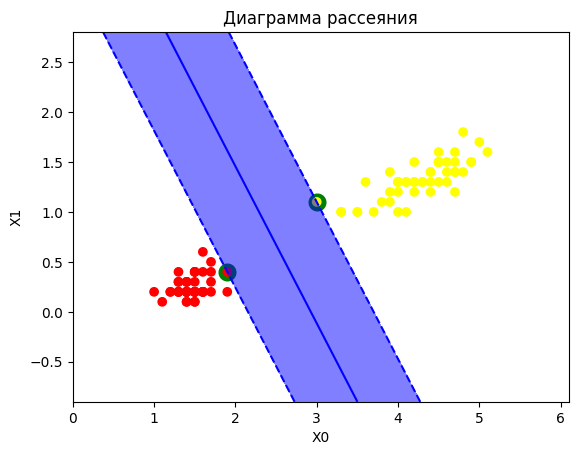

In [43]:
plt.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1], linewidths=7, facecolors='green')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

plt.contour(x0_grid, x1_grid, z_grid, colors='b', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.contourf(x0_grid, x1_grid, z_grid, colors='b', levels=[-1, 0, 1], alpha=0.5)

plt.title("Диаграмма рассеяния")
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

7. Сгенерируйте данные для задачи классификации на два класса при помощи `sklearn.datasets.make_classification`, содержащие  два признака и 100 наблюдений так, чтобы граница классов немного перекрывалась. Визуализируйте их на диаграмме рассеяния.

In [44]:
from sklearn.datasets import make_classification

In [45]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, 
                           n_clusters_per_class=1, class_sep=0.8, 
                           n_informative=2, n_redundant=0, n_repeated=0, random_state=3)

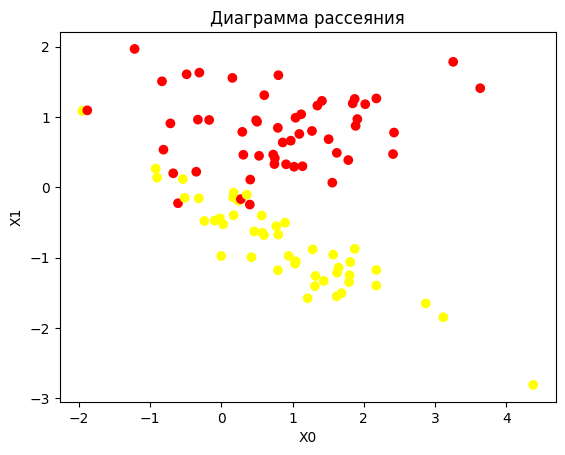

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plt.title("Диаграмма рассеяния")
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

8. Обучите модели опорно-векторного классификатора `sklearn.svm.SVC` с линейным ядром, полиномиальным ядром пятой степени и с RBF-ядром. Сделайте классификацию с мягким зазором, для этого возьмите значение гиперпараметра `C = 1` для всех моделей.

In [47]:
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X, y)

SVC(C=1, kernel='linear')

In [48]:
svm_poly = SVC(kernel='poly', C=1, degree=5)
svm_poly.fit(X, y)

SVC(C=1, degree=5, kernel='poly')

In [49]:
svm_rbf = SVC(kernel='rbf', C=1)
svm_rbf.fit(X, y)

SVC(C=1)

9. Изобразите на диаграмме рассеяния линию разделения и мягкий зазор для каждой модели. Вычислите метрики для оценки работы каждой модели. Сделайте вывод о том, какая модель лучше классифицирует эти данные.

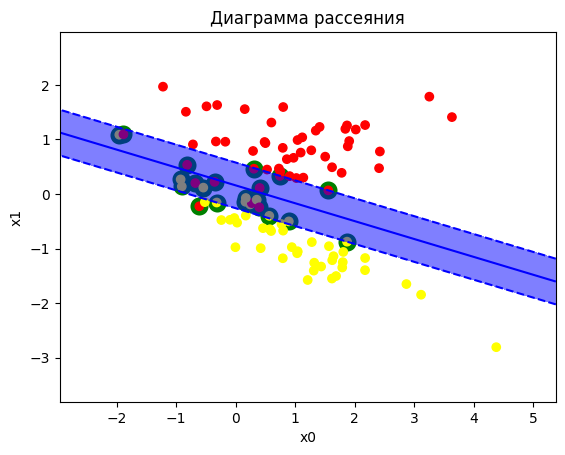

In [50]:
plot_decision_regions(X, y, svm_linear)

In [51]:
y_lin_pred = svm_linear.predict(X)
acc_lin = metrics.accuracy_score(y, y_lin_pred)
acc_lin

0.94

In [52]:
f1_lin = metrics.f1_score(y, y_lin_pred)
f1_lin

np.float64(0.94)

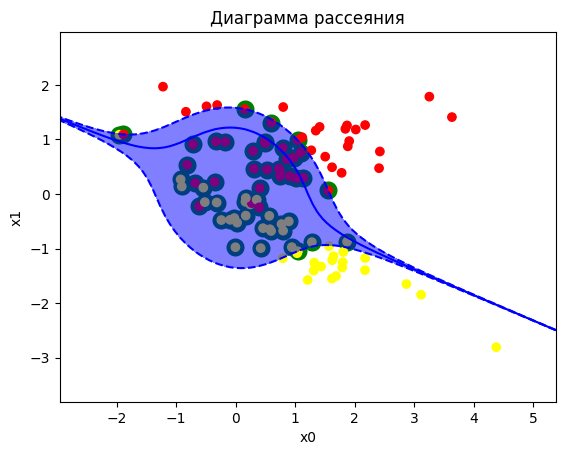

In [53]:
plot_decision_regions(X, y, svm_poly)

In [54]:
y_poly_pred = svm_poly.predict(X)
acc_poly = metrics.accuracy_score(y, y_poly_pred)
acc_poly

0.78

In [55]:
f1_poly = metrics.f1_score(y, y_poly_pred)
f1_poly

np.float64(0.8103448275862069)

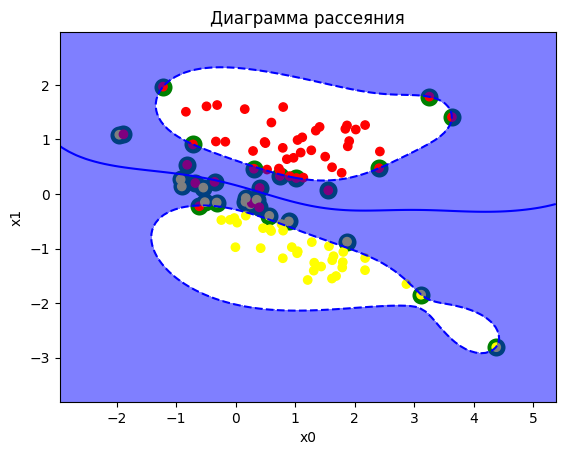

In [56]:
plot_decision_regions(X, y, svm_rbf)

In [57]:
y_rbf_pred = svm_rbf.predict(X)
acc_rbf = metrics.accuracy_score(y, y_rbf_pred)
acc_rbf

0.94

In [58]:
f1_rbf = metrics.f1_score(y, y_rbf_pred)
f1_rbf

np.float64(0.94)